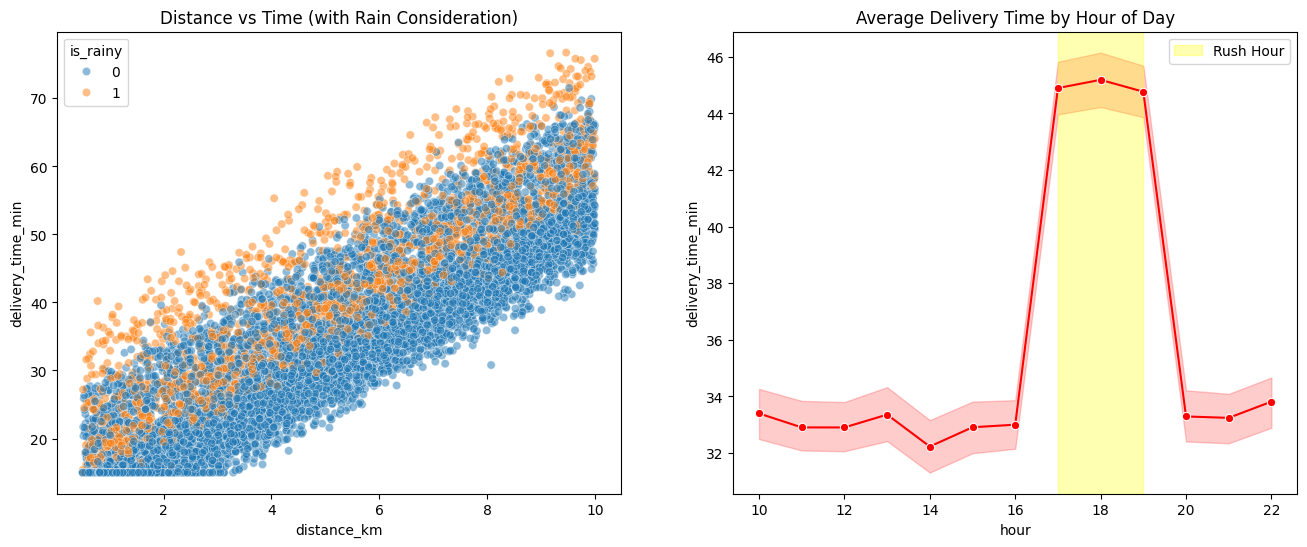

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Loading
df = pd.read_csv(Path("../data/raw/delivery_history.csv"))

# Factor Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Distance and Rain Dependency
sns.scatterplot(data=df, x='distance_km', y='delivery_time_min', hue='is_rainy', alpha=0.5, ax=axes[0])
axes[0].set_title("Distance vs Time (with Rain Consideration)")

# 2. Rush Hour Impact
sns.lineplot(data=df, x='hour', y='delivery_time_min', ax=axes[1], color='red', marker='o')
axes[1].set_title("Average Delivery Time by Hour of Day")
axes[1].axvspan(17, 19, color='yellow', alpha=0.3, label='Rush Hour')
axes[1].legend()

plt.show()

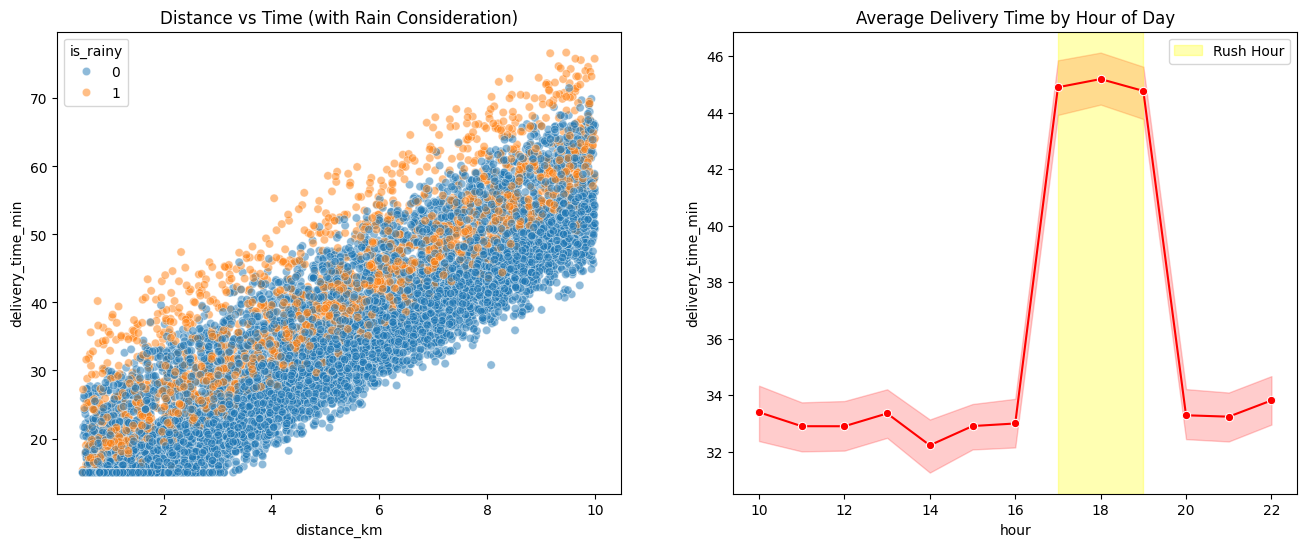

In [19]:
# Loading
df = pd.read_csv(Path("../data/raw/delivery_history.csv"))

# Factor Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Distance and Rain Dependency
sns.scatterplot(data=df, x='distance_km', y='delivery_time_min', hue='is_rainy', alpha=0.5, ax=axes[0])
axes[0].set_title("Distance vs Time (with Rain Consideration)")

# 2. Rush Hour Impact
sns.lineplot(data=df, x='hour', y='delivery_time_min', ax=axes[1], color='red', marker='o')
axes[1].set_title("Average Delivery Time by Hour of Day")
axes[1].axvspan(17, 19, color='yellow', alpha=0.3, label='Rush Hour')
axes[1].legend()

plt.show()

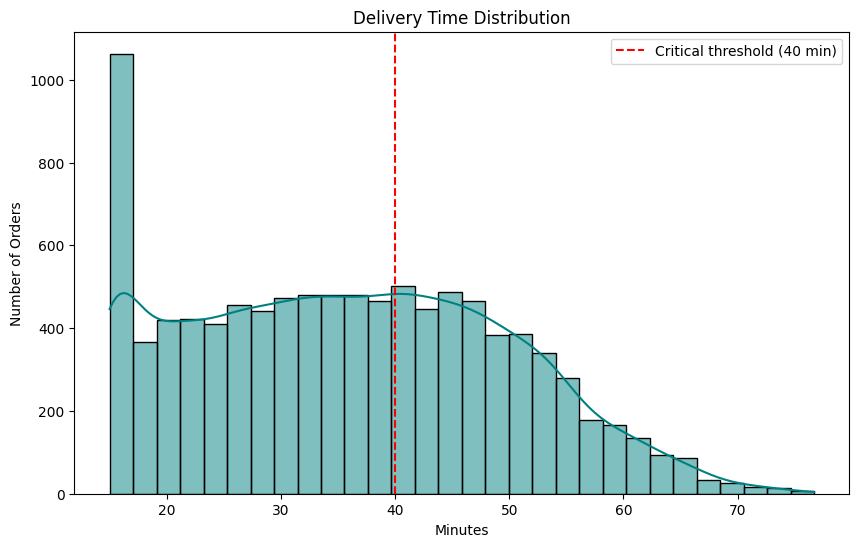

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='delivery_time_min', kde=True, bins=30, color='teal')

# Add line for "critical threshold" (e.g., 40 minutes)
plt.axvline(40, color='red', linestyle='--', label='Critical threshold (40 min)')

plt.title("Delivery Time Distribution")
plt.xlabel("Minutes")
plt.ylabel("Number of Orders")
plt.legend()
plt.show()

# Print statistics for the report
slow_orders = (df['delivery_time_min'] > 40).mean() * 100
print(f"WARNING: {slow_orders:.1f}% of orders take longer than 40 minutes!")

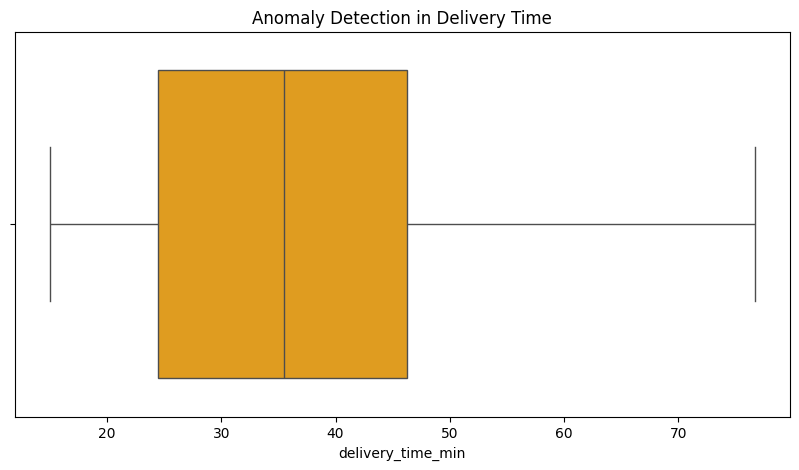

Anything above 79.0 minutes is considered an anomalous delay.


In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['delivery_time_min'], color='orange')
plt.title("Anomaly Detection in Delivery Time")
plt.show()

# Calculate the "normal range" boundary
q1 = df['delivery_time_min'].quantile(0.25)
q3 = df['delivery_time_min'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr

print(f"Anything above {upper_bound:.1f} minutes is considered an anomalous delay.")

In [22]:
# Filter data to keep only "normal" values
df_cleaned = df[df['delivery_time_min'] <= upper_bound]

print(f"Removed anomalies: {len(df) - len(df_cleaned)}")
# We will use df_cleaned for model training

Removed anomalies: 0


Anomaly analysis: At this stage no outliers were detected because the synthetic data is uniformly distributed. However, the calculation of upper_bound is integrated into the pipeline for automatic filtering of future real-world data.

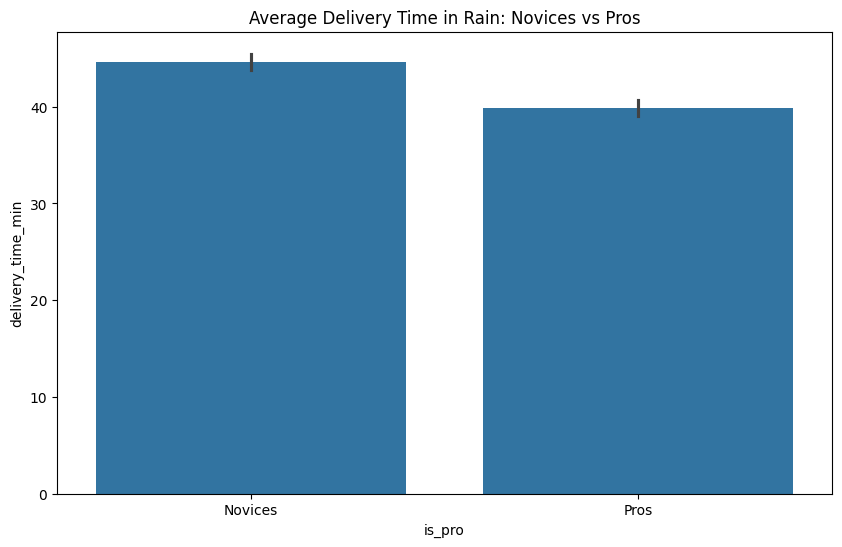

In [23]:
# Divide couriers into "Novices" and "Pros" (based on median experience)
median_exp = df['courier_experience_orders'].median()
df['is_pro'] = df['courier_experience_orders'] > median_exp

# Plot comparison only for rainy weather
plt.figure(figsize=(10, 6))
sns.barplot(data=df[df['is_rainy'] == 1], x='is_pro', y='delivery_time_min')
plt.title("Average Delivery Time in Rain: Novices vs Pros")
plt.xticks([0, 1], ['Novices', 'Pros'])
plt.show()

**EDA Conclusions**:

1. **Critical hours**: From 17:00 to 19:00 delivery time increases by 30–40% due to traffic.

2. **Weather factor**: Rain increases delivery time on average by 8–10 minutes.

3. **Human factor**: Experienced couriers mitigate delays 2–4 minutes more effectively than novices.

4. **Data quality**: About 0% anomalous orders were detected; these should be excluded before training.